## Fremont Bridge Hourly Bicycle Count 

##### Data Visualisation and Analysis excercise from 'Python Data Science Handbook' 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib qt
sns.set()

In [2]:
data = pd.read_csv('FremontBridge.csv',index_col ='Date',parse_dates=True)

In [3]:
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2019-01-01 02:00:00,1.0,11.0
2019-01-01 03:00:00,1.0,2.0
2019-01-01 04:00:00,2.0,1.0


In [4]:
#shortening column names and adding Total column
data.columns=['West','East']
data['Total']=data.eval('West+East')

In [5]:
data.dropna().describe()

,West,East,Total
count,59823.000000,59823.000000,59823.000000
mean,52.619795,60.262324,112.882119
std,67.734326,87.871363,143.101423
min,0.000000,0.000000,0.000000
25%,6.500000,7.000000,15.000000
50%,29.000000,30.000000,61.000000
75%,70.000000,73.000000,147.000000
max,698.000000,850.000000,1097.000000


Text(0, 0.5, 'Hourly Bicycle Count')

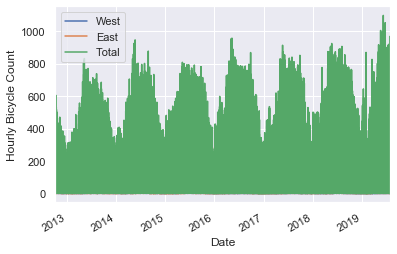

In [6]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

Text(0, 0.5, 'Weekly Bicycle Count')

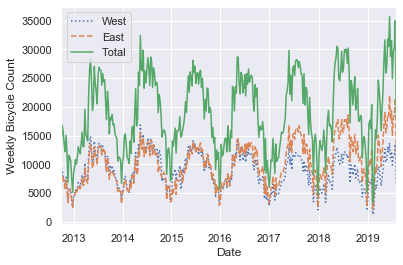

In [7]:
#Above plot is far too dense
#Resampling data to a coarser grid

weekly = data.resample('W').sum()
weekly.plot(style=[':','--','-'])
plt.ylabel('Weekly Bicycle Count')

#Counts at start and end of an year(winter season) are low
#as compared to mid of an year(summer season)

Text(0, 0.5, 'mean hourly count')

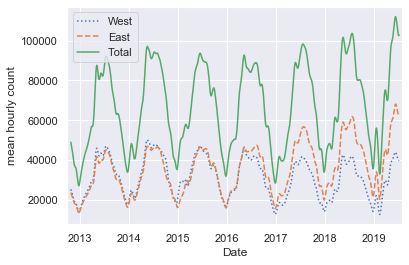

In [8]:
#50 day rolling mean with gaussian window to smooth the plot

daily = data.resample('D').sum()
daily.rolling(50, center=True,win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')

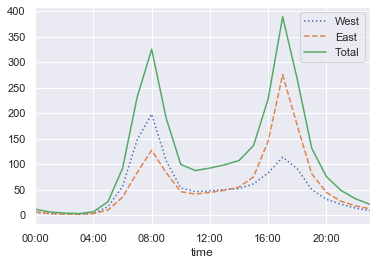

In [9]:
#Grouping by time to get average traffic

by_time = data.groupby(data.index.time).mean()
#6 bins
hourly_ticks = 4*3600*np.arange(6)
by_time.plot(xticks=hourly_ticks,style=[':','--','-'])

#Below plot shows peaks around 8 am and 5 pm, most likely due to commuter traffic
#Western sidewalk is used more in the morning, to go towards downtown Seattle
#Eastern one peaks strongly in the evening, to come back from Seatlle downtown

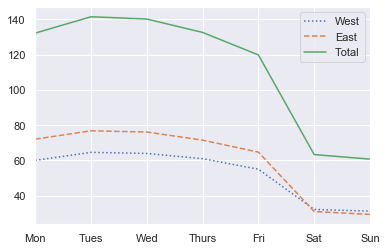

In [10]:
#Changes due to Day of the week

by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

#Below plot supports our above analysis that the bridge is used more
#by commuters during weekdays and during weekends the count drops about half

In [ ]:
#Compound groupby to look at hourly trend on weekends vs weekdays

weekend = np.where(data.index.weekday < 5,'Weekday','Weekend')
by_time = data.groupby([weekend,data.index.time]).mean()
fig,ax = plt.subplots(1,2,figsize=(14,5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',xticks=hourly_ticks, style=[':', '--', '-'])